## Loan_approval_classification
##### The goal of this practice project is to determine wheter a certain loan would be approved based on several features that we'll explore 
## The dataset
##### This dataset is taken from  [Kaggle](https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset) , it contains 4269 rows and 13 columns. Our target variable is callen "loan_status"



In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [315]:
df = pd.read_csv("loan_approval_dataset.csv")

In [316]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Data Preprocessing

### This line of code below removes all the unnecessary whitespaces from the column names and the values of our target variable

In [317]:
df.columns = df.columns.str.strip()
df.dtypes





loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [318]:
df['loan_status']=df['loan_status'].str.strip()


In [319]:
df['loan_status'] = df['loan_status'].map({'Rejected': 0, 'Approved': 1})


In [320]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [321]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [322]:
columns = df.columns

In [323]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [324]:
df['education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [325]:
df['education']=df['education'].map({'Graduate':1,'Not Graduate':0})

In [326]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [327]:
df= df.drop(columns=['loan_id'])

In [328]:
df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [329]:
df['self_employed']=df['self_employed'].map({'Yes':1,'No':0})

In [330]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [331]:
df.describe()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000
mean,2.498712,0.502225,0.503631,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.622160
std,1.695910,0.500054,0.500045,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.484904
min,0.000000,0.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000
25%,1.000000,0.000000,0.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000
50%,3.000000,1.000000,1.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.000000
75%,4.000000,1.000000,1.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000
max,5.000000,1.000000,1.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000


In [332]:
df.isna().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [333]:
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

## Data visualization

<Axes: xlabel='loan_status', ylabel='count'>

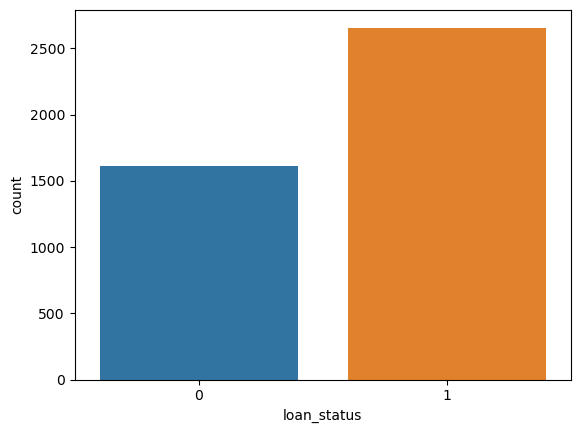

In [334]:
sns.countplot(data=df,x='loan_status')

<Axes: xlabel='education', ylabel='count'>

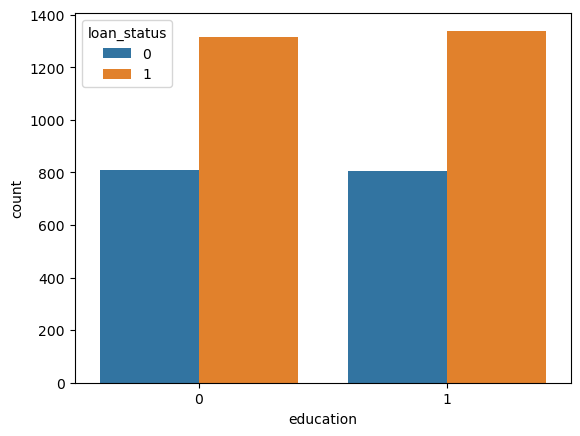

In [335]:
sns.countplot(data=df,x='education',hue='loan_status')

<Axes: xlabel='self_employed', ylabel='count'>

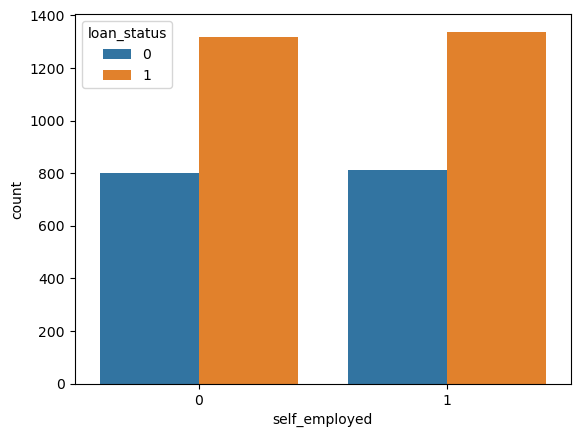

In [336]:
sns.countplot(data=df,x='self_employed',hue='loan_status')

In [337]:
df['cibil_grp'] = np.where((df['cibil_score']>=300) & (df['cibil_score']<=500),"low",
                               np.where((df['cibil_score']>500)& (df['cibil_score']<600),"mid","high"))

<Axes: xlabel='cibil_grp', ylabel='count'>

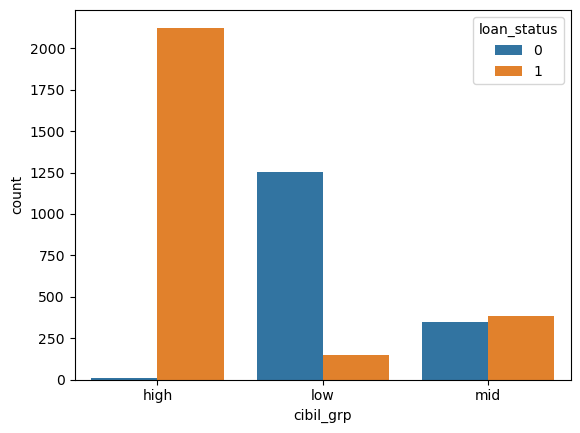

In [338]:
sns.countplot(data=df,x='cibil_grp',hue='loan_status')

<Axes: xlabel='self_employed', ylabel='count'>

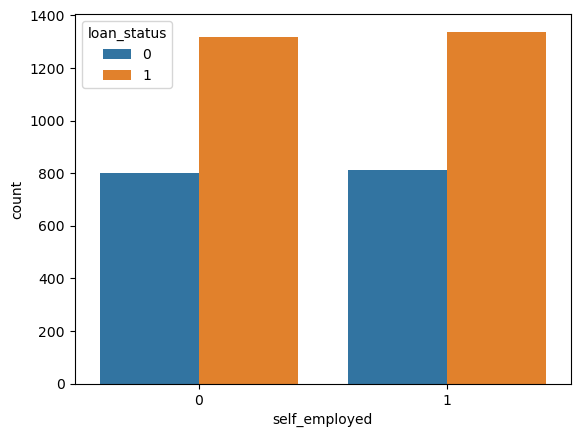

In [339]:
sns.countplot(data=df,x='self_employed',hue='loan_status')

In [340]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_grp
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,high
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,low
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,mid
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,low
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,low


In [341]:
df['cibil_grp']=df['cibil_grp'].map({'high':3,'mid':2,'low':1})

In [342]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_grp
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,3
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,2
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,1
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1


<Axes: xlabel='cibil_grp', ylabel='count'>

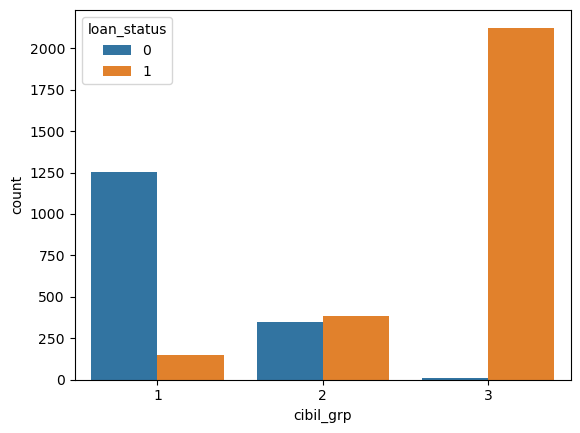

In [343]:
sns.countplot(data=df,x='cibil_grp',hue='loan_status')

<Axes: xlabel='loan_amount', ylabel='Count'>

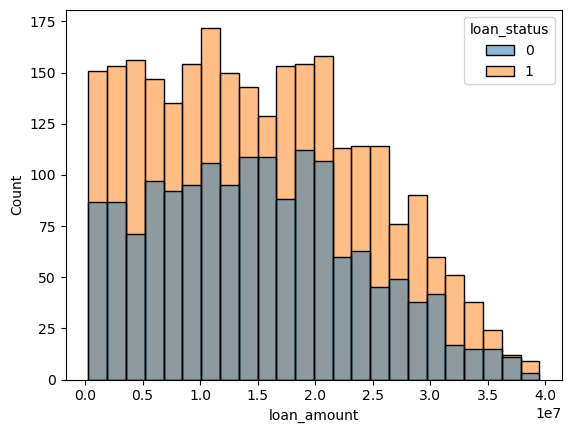

In [344]:
sns.histplot(data=df,x='loan_amount',hue='loan_status')

<Axes: xlabel='loan_term', ylabel='Count'>

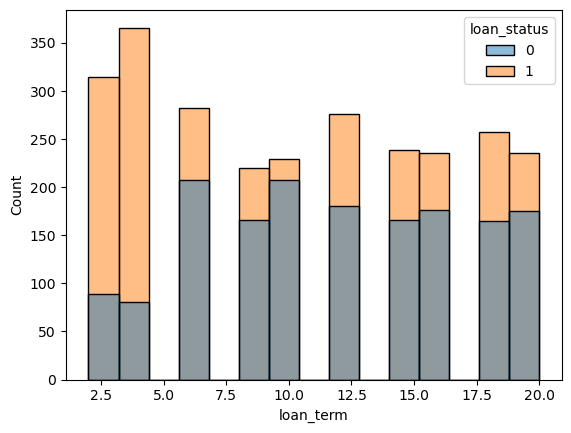

In [345]:
sns.histplot(data=df,x='loan_term',hue='loan_status')

<Axes: >

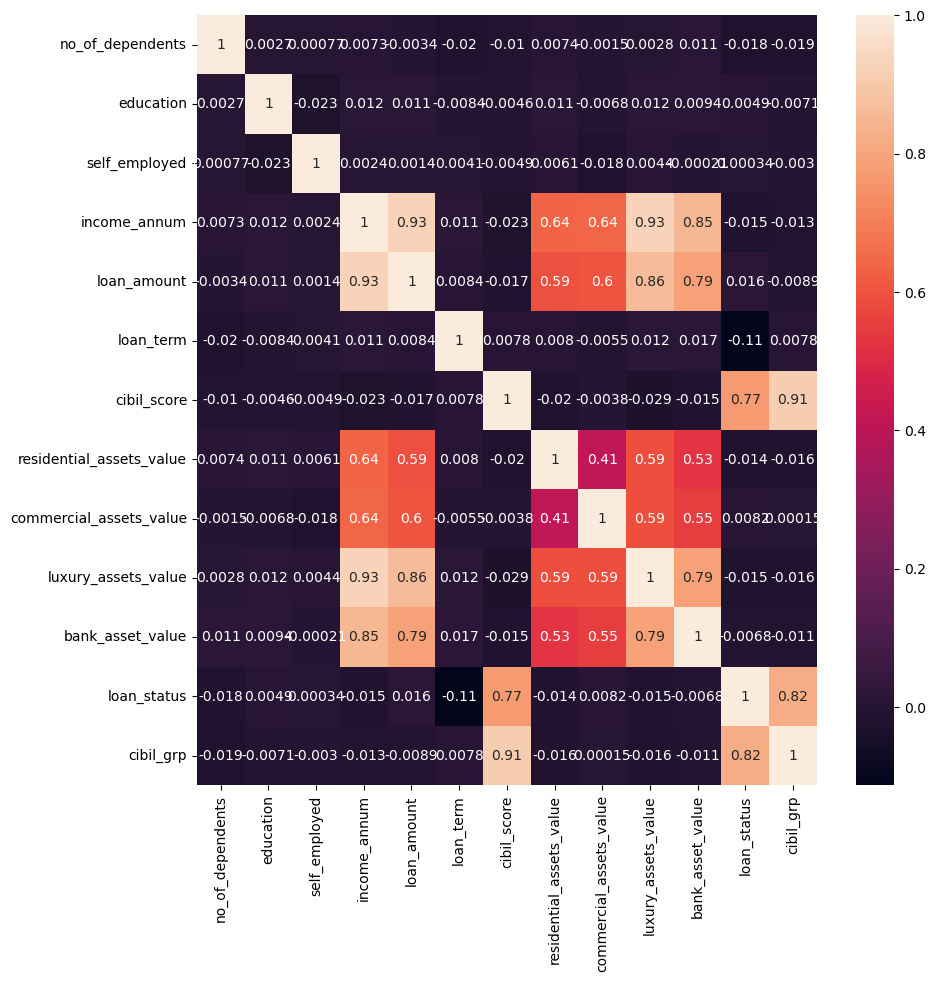

In [346]:
plt.figure(figsize = (10,10))

sns.heatmap(df.corr(),annot=True)

In [347]:
df_filter=df.drop(columns=['luxury_assets_value','bank_asset_value','income_annum'])

<Axes: >

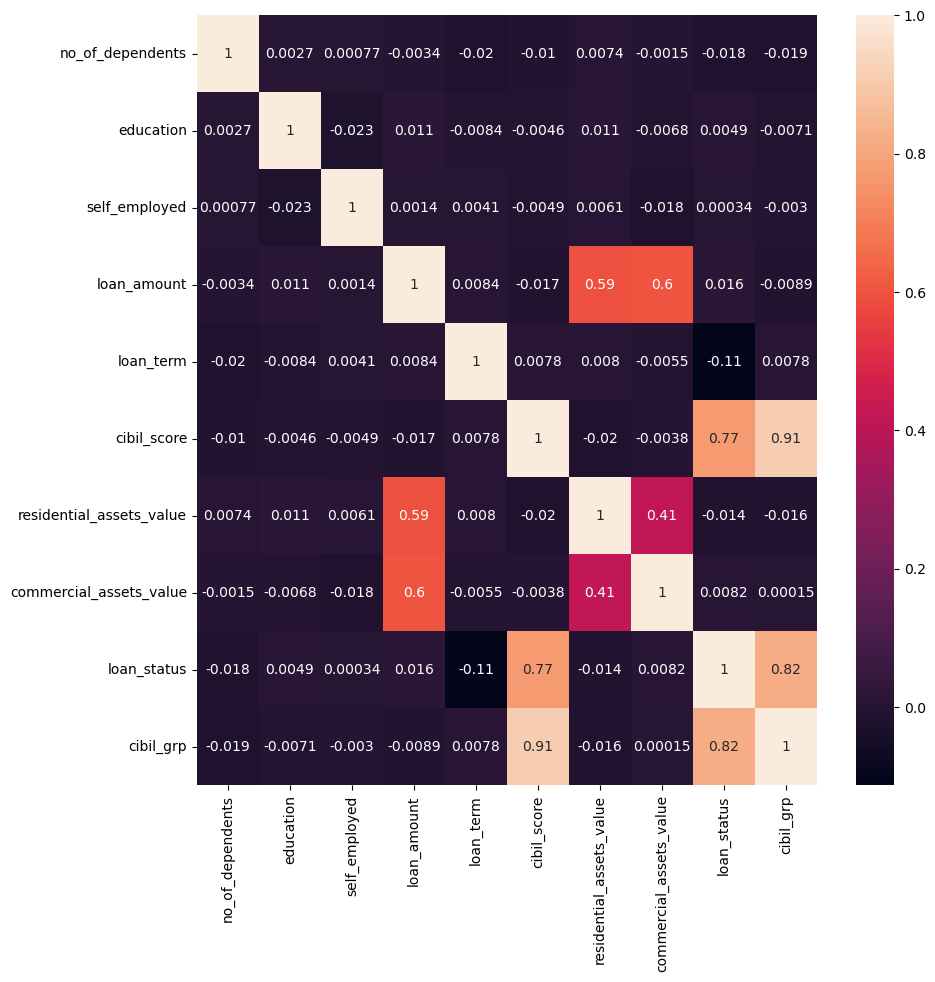

In [348]:
plt.figure(figsize = (10,10))

sns.heatmap(df_filter.corr(),annot=True)

In [349]:
df_filter=df_filter.drop(columns=['cibil_grp'])

## **Summary of our EDA**
##### 1) Our target variable is unbalanced , we might need an oversampling technique when building our predictive model.
##### 2) People with a high cibil score have a higher chance of having their loan accepted
##### 3) Education and self_employed do not necessarely provide any kind of additive information
##### 4) As the lown terme increases , we have a fewer chance of the loan to be accepted
##### 5) The loan amount doesnt necessarely determine if our loan is gonna be accepted

In [350]:
from imblearn.over_sampling import SMOTE


In [351]:
X=df_filter.drop(columns=['loan_status'])
Y=df_filter['loan_status']

smote = SMOTE(sampling_strategy='auto')
x_resampled, y_resampled = smote.fit_resample(X, Y)

#### Now our dataset should be balanced

In [352]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.33,random_state=42)

In [353]:
from sklearn.linear_model import LogisticRegression

In [354]:
lr = LogisticRegression()

In [355]:
lr.fit(x_train,y_train)

LogisticRegression()

In [356]:
lr_predicted_train=lr.predict(x_train)

In [357]:
lr_predicted_test=lr.predict(x_test)

In [358]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


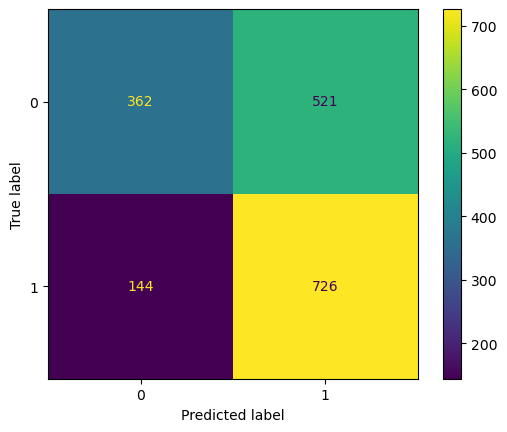

In [359]:
cm_lr = confusion_matrix(y_test, lr_predicted_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot()
plt.show()

In [360]:
print(classification_report(y_test ,lr_predicted_test))

              precision    recall  f1-score   support

           0       0.72      0.41      0.52       883
           1       0.58      0.83      0.69       870

    accuracy                           0.62      1753
   macro avg       0.65      0.62      0.60      1753
weighted avg       0.65      0.62      0.60      1753



In [361]:
from sklearn.preprocessing import MinMaxScaler

In [362]:
norm = MinMaxScaler()
x_train_norm = norm.fit_transform(x_train)
x_test_norm = norm.transform(x_test)

In [363]:
lr_norm=LogisticRegression()

In [364]:
lr_norm.fit(x_train_norm,y_train)
lr_predicted_train_norm=lr_norm.predict(x_train_norm)

In [365]:
lr_predicted_test_norm=lr_norm.predict(x_test_norm)

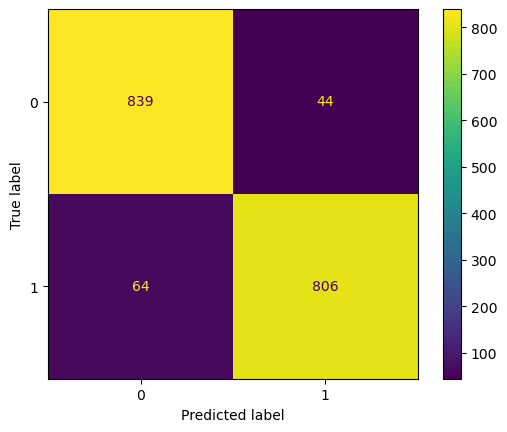

In [366]:
cm_lr_norm = confusion_matrix(y_test, lr_predicted_test_norm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr_norm)
disp.plot()
plt.show()

In [367]:
print(classification_report(y_test ,lr_predicted_test_norm))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       883
           1       0.95      0.93      0.94       870

    accuracy                           0.94      1753
   macro avg       0.94      0.94      0.94      1753
weighted avg       0.94      0.94      0.94      1753



#### As we see , normalizing our data increased our model's accuracy by nearly 20%

In [368]:
from sklearn.ensemble import RandomForestClassifier


In [369]:
forest=RandomForestClassifier(random_state=40)
forest.fit(x_train_norm,y_train)
forest_predicted_train = forest.predict(x_train_norm) 
forest_predicted_test = forest.predict(x_test_norm)

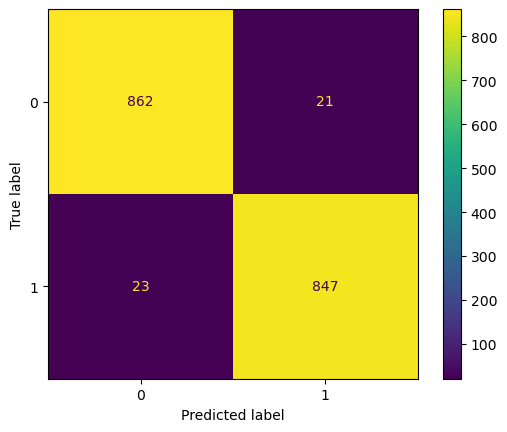

In [370]:
cm_forest = confusion_matrix(y_test, forest_predicted_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_forest)
disp.plot()
plt.show()

In [371]:
print(classification_report(y_test ,forest_predicted_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       883
           1       0.98      0.97      0.97       870

    accuracy                           0.97      1753
   macro avg       0.97      0.97      0.97      1753
weighted avg       0.97      0.97      0.97      1753



In [372]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Error Rate')

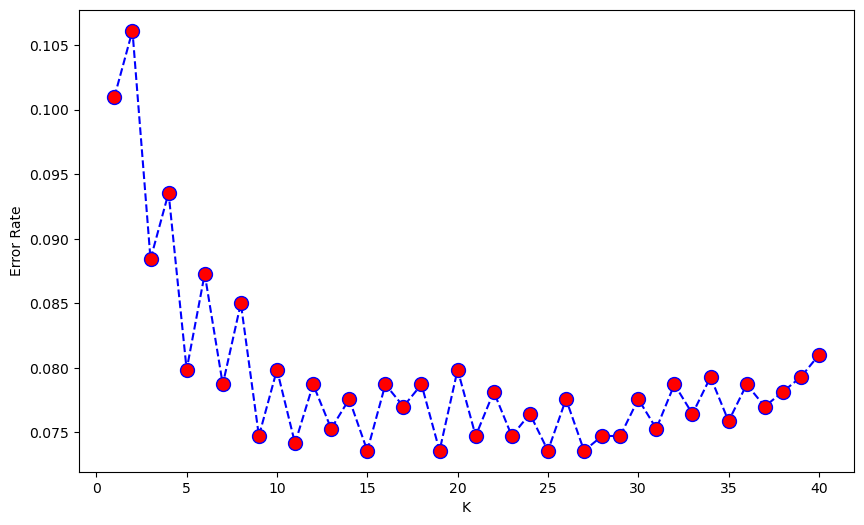

In [373]:
error=[]
for neighbor in range(1,41):
    knn=KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(x_train_norm,y_train)
    pred_nei=knn.predict(x_test_norm)
    error.append(np.mean(pred_nei != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,41),error,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.xlabel('K')
plt.ylabel('Error Rate')


#### This is called the **elbow method** to determin the best parameter  "n_neighbors" that minimizes our error rate 

In [374]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train_norm,y_train)
knn_predicted_train = knn.predict(x_train_norm) 
knn_predicted_test = knn.predict(x_test_norm)

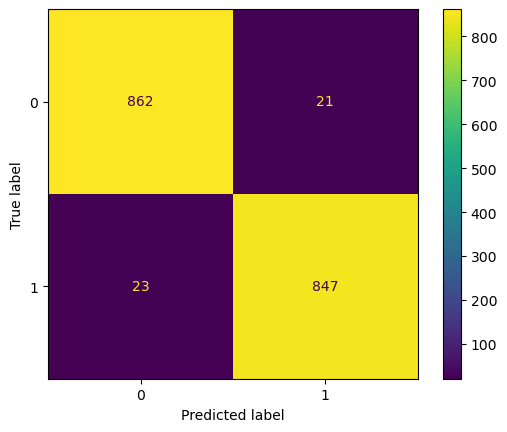

In [375]:
cm_knn = confusion_matrix(y_test, forest_predicted_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()
plt.show()

In [376]:
print(classification_report(y_test ,forest_predicted_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       883
           1       0.98      0.97      0.97       870

    accuracy                           0.97      1753
   macro avg       0.97      0.97      0.97      1753
weighted avg       0.97      0.97      0.97      1753



In [377]:
import xgboost as xgb


In [378]:
xgboo = xgb.XGBClassifier()
xgboo.fit(x_train_norm , y_train)
xgb_predicted_train=xgboo.predict(x_train_norm)
xgb_predicted_test=xgboo.predict(x_test_norm)



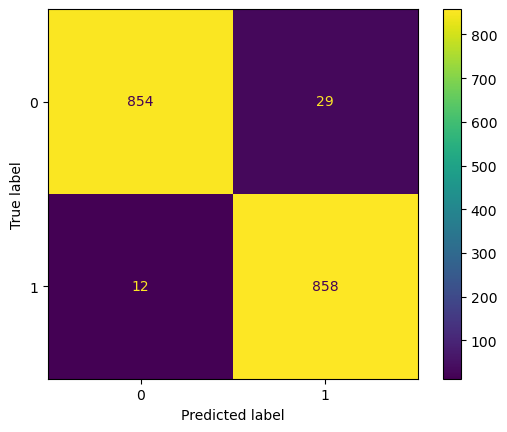

In [379]:
cm_xgb = confusion_matrix(y_test, xgb_predicted_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp.plot()
plt.show()

In [380]:
print(classification_report(y_test ,xgb_predicted_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       883
           1       0.97      0.99      0.98       870

    accuracy                           0.98      1753
   macro avg       0.98      0.98      0.98      1753
weighted avg       0.98      0.98      0.98      1753



In [381]:
from sklearn.tree import DecisionTreeClassifier


In [382]:
dt = DecisionTreeClassifier()
dt.fit(x_train_norm, y_train)
dt_predicted_train=xgboo.predict(x_train_norm)
dt_predicted_test=xgboo.predict(x_test_norm)



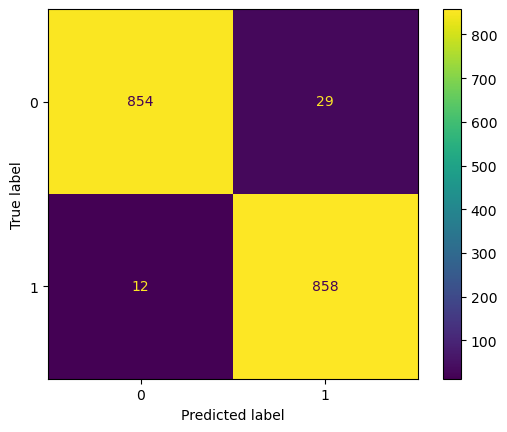

In [383]:
cm_dt = confusion_matrix(y_test, dt_predicted_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot()
plt.show()

In [384]:
print(classification_report(y_test ,dt_predicted_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       883
           1       0.97      0.99      0.98       870

    accuracy                           0.98      1753
   macro avg       0.98      0.98      0.98      1753
weighted avg       0.98      0.98      0.98      1753



In [385]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [386]:
models = {
    'Logistic Regression': LogisticRegression(),
    'XGBoost': xgboo,
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=15)
}
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
for model_name, model in models.items():
    model.fit(x_train_norm, y_train)
    y_pred = model.predict(x_test_norm)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics_df = metrics_df.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }, ignore_index=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_8420\4125215274.py:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Asus\AppData\Local\Temp\ipykernel_8420\4125215274.py:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Asus\AppData\Local\Temp\ipykernel_8420\4125215274.py:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Asus\AppData\Local\Temp\ipykernel_8420\4125215274.py:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Asus\AppData\Local\Temp\ipykernel_8420\4125215274.py:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

In [387]:
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.938391,0.938609,0.938391,0.938378
1,XGBoost,0.976612,0.976794,0.976612,0.976611
2,Decision Tree,0.967484,0.967491,0.967484,0.967485
3,Random Forest,0.973759,0.973770,0.973759,0.973760
4,KNN,0.922989,0.926955,0.922989,0.922780


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'XGBoost'),
  Text(2, 0, 'Decision Tree'),
  Text(3, 0, 'Random Forest'),
  Text(4, 0, 'KNN')])

<Figure size 1000x1000 with 0 Axes>

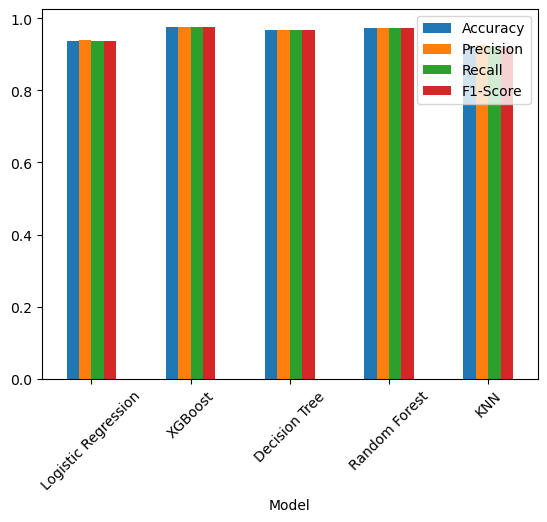

In [388]:
plt.figure(figsize=(10,10))
metrics_df.plot(kind='bar',x='Model')
plt.xticks(rotation=45)

##### As we can see , XGboost and RandomForest are the best models in this sitatuion , so we'll try to do some hyperparameter tunning to get an even better results
##### I'll stick to XGboost for this time


In [389]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}
grid_search = GridSearchCV(estimator=xgboo, param_grid=param_grid, cv=5)
grid_search.fit(x_train_norm, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}


In [390]:
best_xgb_classifier = xgb.XGBClassifier(
    colsample_bytree=best_params['colsample_bytree'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_child_weight=best_params['min_child_weight'],
    n_estimators=best_params['n_estimators']    ,
    subsample=best_params['subsample']
)
best_xgb_classifier.fit(x_train_norm, y_train)
best_model_predict_test = best_xgb_classifier.predict(x_test_norm)
best_model_predict_train = best_xgb_classifier.predict(x_train_norm)





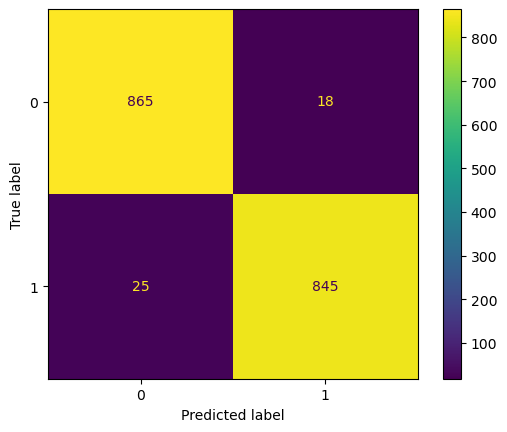

In [391]:
cm_final = confusion_matrix(y_test, best_model_predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_final)
disp.plot()
plt.show()

In [392]:
print(classification_report(y_test ,best_model_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       883
           1       0.98      0.97      0.98       870

    accuracy                           0.98      1753
   macro avg       0.98      0.98      0.98      1753
weighted avg       0.98      0.98      0.98      1753



#### The GridsearchCv didn't result in a way better model , so we'll stick to the default one , i could expand my search grid but it would take me so much time to run the code
